In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Pandas DataFrame:
df = pd.read_csv(
    r"E:\\python\\ - Superstore.csv",
    encoding="latin1"
)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])   
df['Ship Date']=pd.to_datetime(df['Ship Date']) 

In [9]:
df['Discount']=df['Discount']/100

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [11]:
# Count how many orders come from each Region
orders_by_region = df['Region'].value_counts()
print("Orders by Region:\n", orders_by_region)


Orders by Region:
 Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


In [12]:
# Group the data by Category and sum Sales & Profit
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum()
print("Total Sales and Profit by Category:\n", category_sales_profit)


Total Sales and Profit by Category:
                        Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


In [13]:
# Group by Customer Name and sum Sales, then sort descending to get top 10
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Sales:\n", top_customers)


Top 10 Customers by Sales:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [14]:
# Calculate correlation between Sales and Profit
correlation = df[['Sales', 'Profit']].corr()
print("Correlation between Sales and Profit:\n", correlation)


Correlation between Sales and Profit:
            Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000


### # --- Visualizations ---

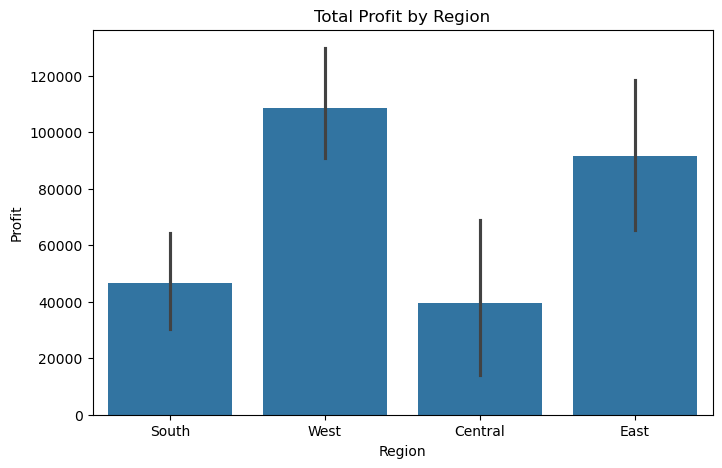

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum)
plt.title('Total Profit by Region')
plt.show()


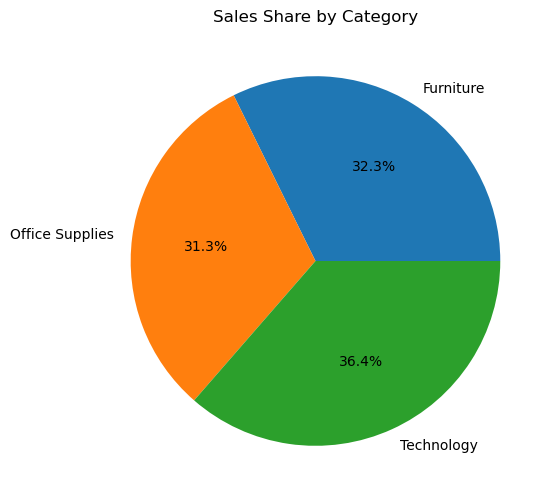

In [16]:
plt.figure(figsize=(6,6))
df.groupby('Category')['Sales'].sum().plot.pie(autopct='%1.1f%%')
plt.title('Sales Share by Category')
plt.ylabel('')
plt.show()


# This pie chart illustrates the distribution of total sales among different product categories. Each segment corresponds to a category, with its size indicating its share of overall sales. It offers a clear visual overview of which categories contribute the most to total revenue.

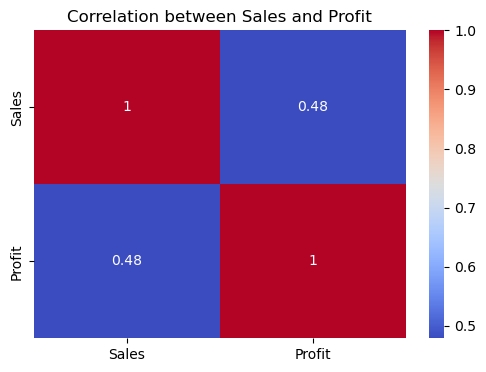

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Profit')
plt.show()

# This illustrates the relationship between Sales and Profit. The values represent the strength of their correlation, where numbers closer to 1 indicate a strong positive association. It provides a quick visual insight into whether increases in sales typically correspond to higher profits.

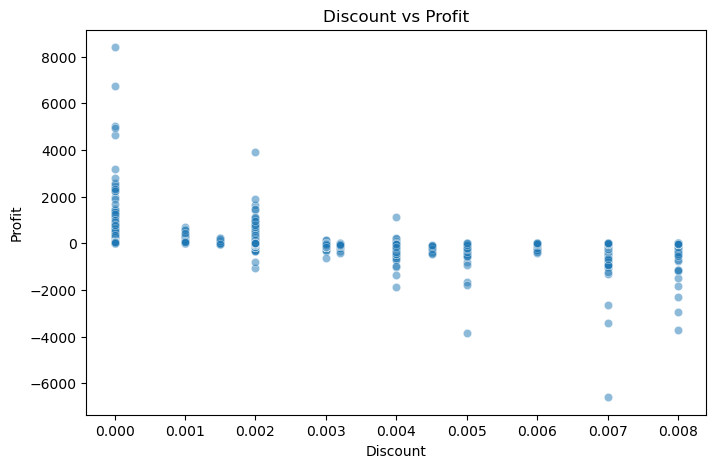

Discount vs Profit correlation:
           Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


In [18]:
# --- Discount vs Profit Analysis ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Discount vs Profit')
plt.show()

# Additional stats
print("Discount vs Profit correlation:\n", df[['Discount', 'Profit']].corr())

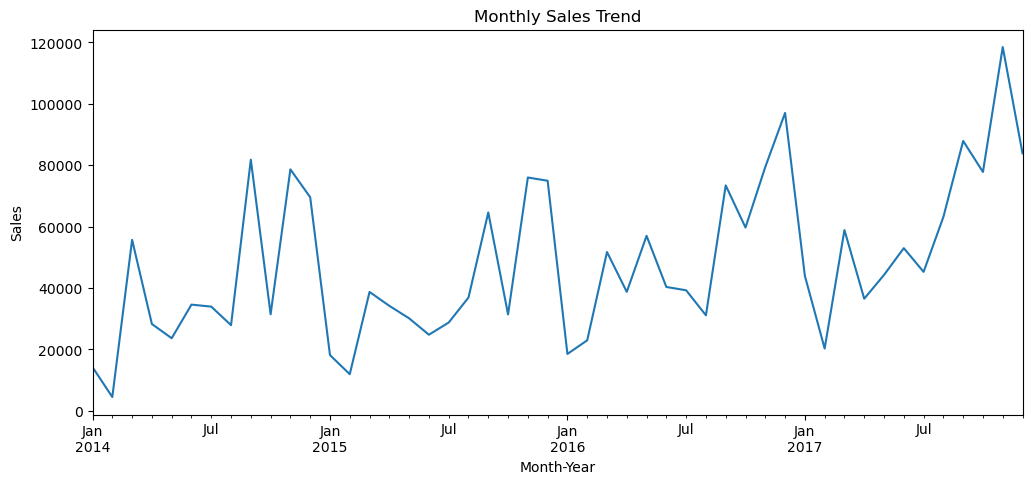

In [19]:
#  Sales Trend over time
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month-year and sum sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.show()

In [20]:
# --- Cell 9: Business Insights (Markdown) ---
"""
Based on the analysis, the following key insights emerge:

The Western region contributes the highest overall profit.

The Office Supplies category shows weak performance in certain regions, with some areas experiencing low or negative profit, indicating room for optimization.

Multiple sub-categories consistently generate losses and require further evaluation.

A negative relationship exists between discount levels and profit, implying that higher discounts may be hurting profitability.

The monthly sales pattern reveals seasonal fluctuations, which can be useful for inventory management and marketing strategies.

Overall, these findings enable the business to prioritize high-performing regions and categories while improving or reassessing underperforming areas.
"""

     

'\nFrom the analysis, we observe:\n\n- The Western region generates the highest total profit.\n- The Office Supplies category, especially in some regions, shows low or negative profitability and could be optimized.\n- Several sub-categories are consistently loss-making and should be reviewed.\n- There is a negative correlation between Discount and Profit, suggesting heavy discounts may reduce profitability.\n- Monthly sales trend shows seasonal variation that could help in planning inventory and marketing.\n\nThese insights can help the business focus on high-profit regions and categories while optimizing or reevaluating low-performing segments.\n'

### Top 20 Customers Contributing the Highest Profit to the Store

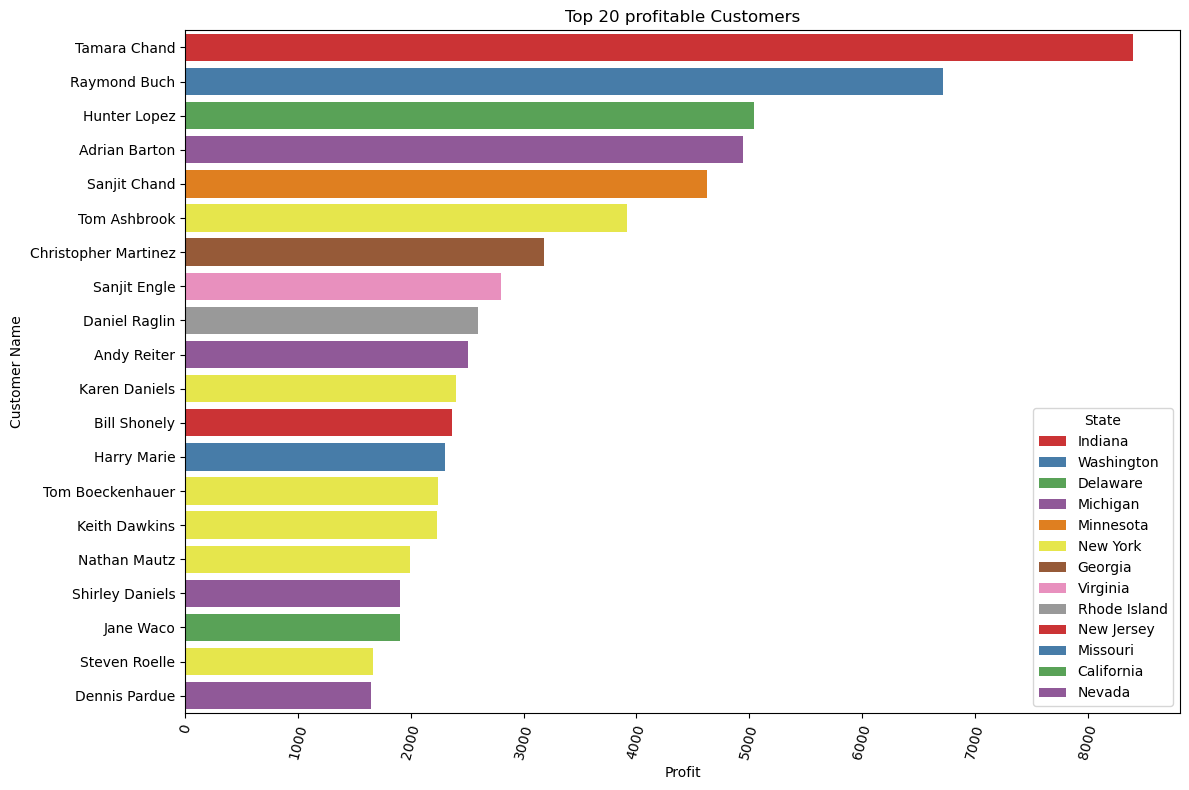

In [21]:
#Top 20 Customers who benefitted the store
# Sort the dataset by Profit in descending order
# and select the top 20 most profitable customers
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
# Add a single subplot (1 row, 1 column, first plot)
ax = fig.add_subplot(111)
p = sns.barplot(y='Customer Name', x='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75) # Rotate x-axis labels to avoid overlapping and improve readability
plt.tight_layout() # Adjust layout so labels and title fit properly within the figure
plt.show()

### Discount

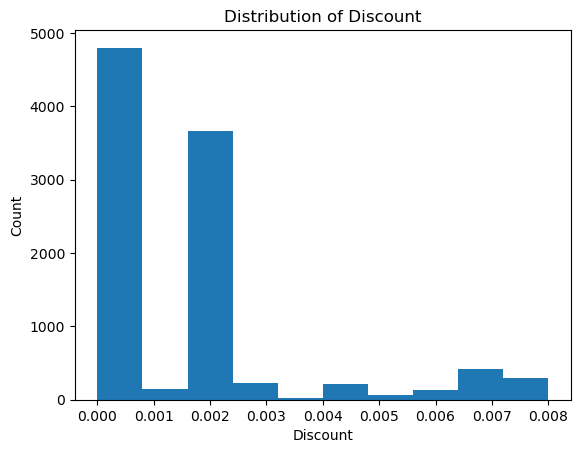

In [26]:
plt.hist(x='Discount',data=df)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()

### Comparison of loss

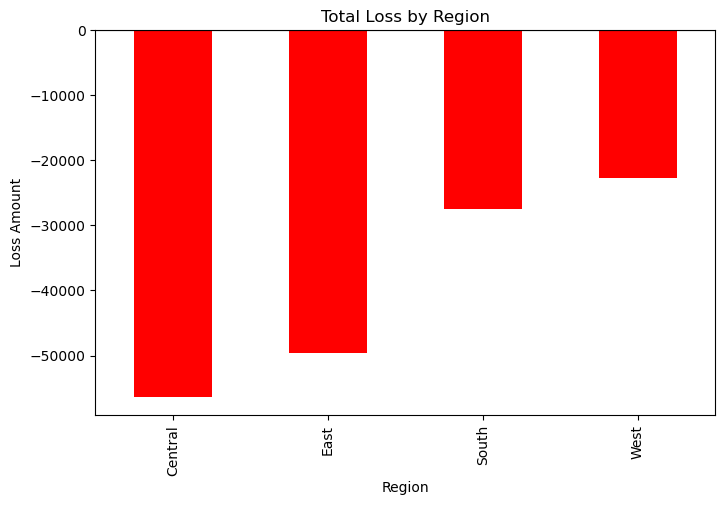

In [39]:


# Filter only loss-making records
loss_df = df[df['Profit'] < 0]

# Calculate total loss by region
loss_by_region = loss_df.groupby('Region')['Profit'].sum()

# Plot all regions with loss
plt.figure(figsize=(8,5))
loss_by_region.plot(kind='bar', color='red')
plt.title('Total Loss by Region')
plt.xlabel('Region')
plt.ylabel('Loss Amount')
plt.axhline(0, color='black')  # separates profit/loss visually
plt.show()

In [41]:
# Total loss across all regions
total_loss = df[df['Profit'] < 0]['Profit'].sum()
print("Total Loss Across All Regions:", total_loss)

Total Loss Across All Regions: -156131.2857


### Top loss  making products and categories by region 

In [42]:
# 1. Filter only loss-making orders
loss_df = df[df['Profit'] < 0]
# 2. Group by Region and Category (or Product) and sum the loss
loss_by_region_category = loss_df.groupby(['Region', 'Category'])['Profit'].sum().sort_values()

# 3. Display top loss contributors
print("Top Loss Contributors by Region and Category:")
print(loss_by_region_category)
# Optional: If you want to see top 5 loss-making products in each region
top_loss_products = loss_df.groupby(['Region', 'Product Name'])['Profit'].sum().sort_values()
print("\nTop Loss-Making Products by Region:")
print(top_loss_products.head(10))

Top Loss Contributors by Region and Category:
Region   Category       
Central  Office Supplies   -33484.1655
East     Technology        -20997.6322
Central  Furniture         -19554.3653
East     Furniture         -18801.7854
West     Furniture         -12657.9337
South    Furniture          -9922.0246
East     Office Supplies    -9791.1899
South    Office Supplies    -9713.5112
         Technology         -7869.2965
West     Technology         -6436.6353
         Office Supplies    -3626.3919
Central  Technology         -3276.3542
Name: Profit, dtype: float64

Top Loss-Making Products by Region:
Region   Product Name                                                               
East     Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
Central  GBC DocuBind P400 Electric Binding System                                     -5552.8392
South    Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
Central  Fellowe